#Libraries and Data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import itertools
from prophet import Prophet
import yfinance
import pickle



/Users/vipin/opt/anaconda3/envs/my_own/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
#load the datast
#[OLECTRA,"LT"]
stock_name = "LT"
data = yfinance.download (tickers = "{}.NS".format(stock_name),start="2000-03-06",
                               interval = "1d", group_by = 'ticker', auto_adjust = True)

data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-06-22,2394.600098,2424.000000,2380.000000,2416.250000,1741775
2023-06-23,2418.949951,2427.000000,2383.250000,2389.550049,1212955
2023-06-26,2398.100098,2403.850098,2367.949951,2377.550049,793572
2023-06-27,2387.449951,2396.949951,2371.550049,2388.050049,1012317
2023-06-30,2420.000000,2483.500000,2415.050049,2475.550049,2690469


#Data preparation

In [3]:
#transform the date variable
data["Data"] = pd.to_datetime(data.index, format = "%m/%d/%Y")
data.Data

Date
2002-07-01   2002-07-01
2002-07-02   2002-07-02
2002-07-03   2002-07-03
2002-07-04   2002-07-04
2002-07-05   2002-07-05
                ...    
2023-06-22   2023-06-22
2023-06-23   2023-06-23
2023-06-26   2023-06-26
2023-06-27   2023-06-27
2023-06-30   2023-06-30
Name: Data, Length: 5219, dtype: datetime64[ns]

In [4]:
#renaming variables
data = data.rename(columns = {'Close': 'y',
                     'Data': 'ds'})
data.tail(10)

,Open,High,Low,y,Volume,ds
Date,,,,,,
2023-06-15,2355.000000,2369.500000,2349.000000,2361.300049,2561534,2023-06-15
2023-06-16,2363.750000,2380.000000,2352.250000,2366.800049,1794542,2023-06-16
2023-06-19,2379.000000,2419.899902,2361.000000,2366.350098,3111256,2023-06-19
2023-06-20,2364.949951,2389.649902,2354.449951,2382.000000,1771306,2023-06-20
2023-06-21,2382.000000,2412.000000,2382.000000,2394.449951,1607299,2023-06-21
2023-06-22,2394.600098,2424.000000,2380.000000,2416.250000,1741775,2023-06-22
2023-06-23,2418.949951,2427.000000,2383.250000,2389.550049,1212955,2023-06-23
2023-06-26,2398.100098,2403.850098,2367.949951,2377.550049,793572,2023-06-26
2023-06-27,2387.449951,2396.949951,2371.550049,2388.050049,1012317,2023-06-27


#Holidays

In [5]:
#Easter
#easter_dates = df[df.Easter == 1].ds
#easter = pd.DataFrame({'holiday': 'easter',
#                      'ds': pd.to_datetime(easter_dates),
#                      'lower_window': -5,
#                      'upper_window': 2})
#easter.head(2)

In [6]:
#Thanksgiving
#thanksgiving_dates = df[df.Thanksgiving == 1].ds
#thanksgiving = pd.DataFrame({'holiday': 'thanksgiving',
 #                      'ds': pd.to_datetime(thanksgiving_dates),
  #                     'lower_window': -5,
   #                    'upper_window': 2})
#thanksgiving.head(2)

In [7]:
#combining holidays
#holidays = pd.concat([easter, thanksgiving])
#holidays

In [8]:
#create training and test set
test_days = 2000
training_set = data.iloc[:-test_days,:]
test_set = data.iloc[-test_days:,:]

In [9]:
 training_set.tail(1)
#test_set.tail(1)

,Open,High,Low,y,Volume,ds
Date,,,,,,
2015-05-26,950.466451,950.466451,934.090175,939.839294,2059530,2015-05-26


#Prophet

In [10]:
m = Prophet(
            #holidays = holidays,
            seasonality_mode = 'multiplicative',
            seasonality_prior_scale = 20,
            changepoint_prior_scale = 0.1,
           # holidays_prior_scale = 10
           )
#m.add_regressor('Christmas')
m.fit(training_set)


17:12:37 - cmdstanpy - INFO - Chain [1] start processing
17:12:44 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
mFullData = Prophet(
            #holidays = holidays,
            seasonality_mode = 'multiplicative',
            seasonality_prior_scale = 20,
            changepoint_prior_scale = 0.1,
           # holidays_prior_scale = 10
           )
#m.add_regressor('Christmas')
mFullData.fit(data)

17:12:44 - cmdstanpy - INFO - Chain [1] start processing
17:12:49 - cmdstanpy - INFO - Chain [1] done processing


In [12]:

# Save the trained model to a file
with open('./TrainedModel/prophet/{}prophet_model_2.pkl'.format(stock_name), 'wb') as f:
    pickle.dump(mFullData, f)

In [24]:
#create future df
future = m.make_future_dataframe(periods = test_days,
                                 freq = "B")

#create future df
future_full = mFullData.make_future_dataframe(periods = 0,
                                 freq = "B")

In [25]:
future_full.tail(1)

,ds
5218,2023-06-30


In [26]:
future = pd.concat([future], axis = 1)
future_full = pd.concat([future_full], axis = 1)

 

In [27]:
future_full

,ds
0,2002-07-01
1,2002-07-02
2,2002-07-03
3,2002-07-04
4,2002-07-05
...,...
5214,2023-06-22
5215,2023-06-23
5216,2023-06-26
5217,2023-06-27


In [28]:
#forecast
forecast = m.predict(future)
forecast.tail()
#forecast full data
forecast_full = mFullData.predict(future_full)
forecast_full.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
5214,2023-06-22,1602.998768,1900.068086,2221.901538,1602.998768,1602.998768,0.287040,0.287040,0.287040,0.301416,0.301416,0.301416,-0.014376,-0.014376,-0.014376,0.0,0.0,0.0,2063.123441
5215,2023-06-23,1603.557307,1902.506365,2213.634046,1603.557307,1603.557307,0.284266,0.284266,0.284266,0.301576,0.301576,0.301576,-0.017310,-0.017310,-0.017310,0.0,0.0,0.0,2059.393563
5216,2023-06-26,1605.232922,1862.832475,2197.425073,1605.232922,1605.232922,0.273729,0.273729,0.273729,0.299639,0.299639,0.299639,-0.025910,-0.025910,-0.025910,0.0,0.0,0.0,2044.632101
5217,2023-06-27,1605.791461,1882.406846,2190.925001,1605.791461,1605.791461,0.272197,0.272197,0.272197,0.300756,0.300756,0.300756,-0.028559,-0.028559,-0.028559,0.0,0.0,0.0,2042.882961
5218,2023-06-30,1607.467076,1872.110542,2184.179084,1607.467076,1607.467076,0.266271,0.266271,0.266271,0.301576,0.301576,0.301576,-0.035305,-0.035305,-0.035305,0.0,0.0,0.0,2035.489454


In [29]:
data = data.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
data

,index,Date,Open,High,Low,y,Volume,ds
0,0,2002-07-01,30.711183,31.180785,30.711183,30.959595,3709080,2002-07-01
1,1,2002-07-02,31.051471,31.340720,30.966399,31.034458,2500024,2002-07-02
2,2,2002-07-03,31.153555,31.204597,30.643119,30.687359,1910772,2002-07-03
3,3,2002-07-04,30.813268,30.915353,30.500200,30.568256,1515924,2002-07-04
4,4,2002-07-05,30.472977,30.796253,30.472977,30.643122,1038928,2002-07-05
...,...,...,...,...,...,...,...,...
5214,5214,2023-06-22,2394.600098,2424.000000,2380.000000,2416.250000,1741775,2023-06-22
5215,5215,2023-06-23,2418.949951,2427.000000,2383.250000,2389.550049,1212955,2023-06-23
5216,5216,2023-06-26,2398.100098,2403.850098,2367.949951,2377.550049,793572,2023-06-26
5217,5217,2023-06-27,2387.449951,2396.949951,2371.550049,2388.050049,1012317,2023-06-27


In [30]:
#get some variables
prophet_variables = forecast.loc[:, ["trend", "weekly",  "multiplicative_terms"]]
df_xgb = pd.concat([data, prophet_variables], axis = 1)
df_xgb.tail(1)
prophet_variables_full = forecast_full.loc[:, ["trend", "weekly",  "multiplicative_terms"]]
df_xgb_full = pd.concat([data, prophet_variables_full], axis = 1)
#df_xgb_full.tail(1)
df_xgb_full.tail(1)


,index,Date,Open,High,Low,y,Volume,ds,trend,weekly,multiplicative_terms
5218,5218,2023-06-30,2420.0,2483.5,2415.050049,2475.550049,2690469,2023-06-30,1607.467076,0.301576,0.266271


#XGBoost preparation

In [31]:
#create training and test set
test_days = 100
training_set = df_xgb.iloc[:-test_days,:]
test_set = df_xgb.iloc[-test_days:,:]

In [53]:
#isolate X and y
y_train = training_set.y
y_test = test_set.y 
X_train = training_set.iloc[:, 2:]
X_test = test_set.iloc[:, 2:]
#full data 
y_train_full = df_xgb_full.y
x_train_full = df_xgb_full.iloc[:, 2:]


In [56]:
x_train_full = x_train_full.drop(columns=["ds"])
X_train = X_train.drop(columns=["ds"])
X_test = X_test.drop(columns=["ds"])
#x_train_full = x_train_full.drop(columns=["ds"])

KeyError: "['ds'] not found in axis"

In [46]:
#Matrices
import xgboost as xgb
Train = xgb.DMatrix(X_train, label = y_train)
Test = xgb.DMatrix(X_test, label = y_test)

In [58]:
#Matrices FULL DATA
Train_full = xgb.DMatrix(x_train_full, label = y_train_full)


In [59]:
#set the parameters
parameters = {'learning_rate': 0.3,
              'max_depth': 6,
              'colsample_bytree': 1,
              'subsample': 1,
              'min_child_weight' : 1,
              'gamma': 0,
              'random_state': 1502,
              'eval_metric': "rmse",
              'objective': "reg:squarederror"}

#XGBoost

In [36]:
model = xgb.train(params = parameters,
                  dtrain = Train,
                  num_boost_round = 40,
                  evals = [(Test, "y")])

[0]	y-rmse:1668.05514
[1]	y-rmse:1246.32480
[2]	y-rmse:927.36977
[3]	y-rmse:694.71970
[4]	y-rmse:522.26617
[5]	y-rmse:395.50700
[6]	y-rmse:310.54585
[7]	y-rmse:244.12195
[8]	y-rmse:195.46420
[9]	y-rmse:159.50553
[10]	y-rmse:136.43747
[11]	y-rmse:116.38773
[12]	y-rmse:101.89592
[13]	y-rmse:91.21236
[14]	y-rmse:83.32850
[15]	y-rmse:77.16417
[16]	y-rmse:72.30213
[17]	y-rmse:68.75701
[18]	y-rmse:65.56022
[19]	y-rmse:63.02276
[20]	y-rmse:61.03028
[21]	y-rmse:60.86885
[22]	y-rmse:59.33540
[23]	y-rmse:58.94215
[24]	y-rmse:57.96924
[25]	y-rmse:57.93085
[26]	y-rmse:57.88789
[27]	y-rmse:57.12010
[28]	y-rmse:56.88008
[29]	y-rmse:56.86753
[30]	y-rmse:56.83039
[31]	y-rmse:56.23099
[32]	y-rmse:56.14043
[33]	y-rmse:56.09959
[34]	y-rmse:56.09384
[35]	y-rmse:55.59942
[36]	y-rmse:55.18070
[37]	y-rmse:55.21513
[38]	y-rmse:55.20476
[39]	y-rmse:54.85375


In [61]:
#FULL
model_full = xgb.train(params = parameters,
                  dtrain = Train_full,
                  num_boost_round = 40,
                  evals = [(Test, "y")])

[0]	y-rmse:1596.73475
[1]	y-rmse:1133.05514
[2]	y-rmse:803.13947
[3]	y-rmse:571.15815
[4]	y-rmse:406.90252
[5]	y-rmse:290.14213
[6]	y-rmse:208.57922
[7]	y-rmse:148.99581
[8]	y-rmse:106.47658
[9]	y-rmse:76.86734
[10]	y-rmse:55.65378
[11]	y-rmse:40.57601
[12]	y-rmse:30.20651
[13]	y-rmse:22.94605
[14]	y-rmse:20.63111
[15]	y-rmse:17.77038
[16]	y-rmse:17.27330
[17]	y-rmse:16.72810
[18]	y-rmse:16.18778
[19]	y-rmse:19.10234
[20]	y-rmse:20.80400
[21]	y-rmse:20.18981
[22]	y-rmse:18.66911
[23]	y-rmse:18.35916
[24]	y-rmse:18.06493
[25]	y-rmse:17.17612
[26]	y-rmse:20.38702
[27]	y-rmse:19.97485
[28]	y-rmse:19.77224
[29]	y-rmse:20.07630
[30]	y-rmse:20.04198
[31]	y-rmse:19.94121
[32]	y-rmse:19.70867
[33]	y-rmse:19.69589
[34]	y-rmse:22.79933
[35]	y-rmse:22.79956
[36]	y-rmse:22.75984
[37]	y-rmse:22.76039
[38]	y-rmse:22.76348
[39]	y-rmse:21.55643


In [51]:
Train_full

In [37]:
#forecasting
predictions = pd.Series(model.predict(Test), name = "XGBoost")
predictions.index  =test_set.ds

In [62]:

# Save the trained model to a file
with open('./TrainedModel/prophet/{}_prophet_model_1.pkl'.format(stock_name), 'wb') as f:
    pickle.dump(model_full, f)

In [ ]:
#f_predictions = pd.Series(model.predict(Future), name = "XGBoost")
#f_predictions

#VIZ and assessment

In [39]:
#Visualization
training_set.index = training_set.ds
test_set.index = test_set.ds

In [40]:
#forecasting
predictions = pd.Series(model.predict(Test), name = "XGBoost")
predictions.index  =test_set.ds

<Axes: xlabel='ds'>

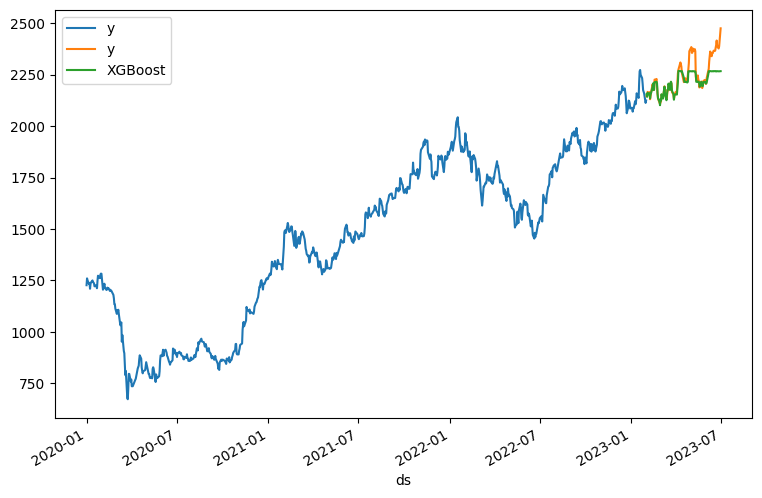

In [41]:
training_set.y['2020-01-01':].plot(figsize = (9,6), legend = True)
test_set.y.plot(legend = True)
predictions.plot(legend = True)

In [ ]:
#MAPE
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set.y, predictions)

#Future



In [ ]:
# Create a dictionary with data
data = {
            'High': [4.123123],
    'Low': [4.123123],
    'y': [210.935516],
    'Volume': [4.123123],
        'trend': [8.12313],
        'weekly': [4.123123],
            'multiplicative_terms': [4.444],
                

                
                }

# Create a new DataFrame object
df = pd.DataFrame(data)


In [ ]:
Future = xgb.DMatrix(df, label = df.y)
f_predictions = pd.Series(model.predict(Future), name = "XGBoost")
f_predictions